In [2]:
library(dplyr)
library(Matrix)
library(data.table)
library(Seurat)
library(RColorBrewer)
library(cowplot)
library(future)
library(ComplexHeatmap)
library(viridis)
library(SeuratObject)
library(readxl)
library(BayesSpace)
library(SingleCellExperiment)
library(ggplot2)
library(getopt)
library(reshape2)
library(gridExtra)
library(harmony)
library(imager)
library(ArchR)
library(ggplot2)
library(ggrastr)
library(parallel) 
library(ggplot2)
library(cols4all)
library(cowplot)
library("shinyjs")
library("kableExtra")
library("colorblindcheck")
library(tidydr) 
options(warn=-1) 
source("/data/work/AD/bin/batch2/00.code/function.R")
cols <- c(brewer.pal(9, "Set1"),brewer.pal(8,"Set2")[1:8],brewer.pal(12,"Paired")[1:12],brewer.pal(8,"Dark2")[1:8],brewer.pal(8,"Accent"))
suppressMessages(library(tidyverse))
suppressMessages(library(parallel))
suppressMessages(library(Seurat))
# suppressMessages(library(SeuratData))
suppressMessages(library(patchwork))
suppressMessages(library(Matrix))
suppressMessages(library(viridis))
suppressMessages(library(cowplot))
suppressMessages(library(pheatmap))
suppressMessages(library(RColorBrewer))
suppressMessages(library(reshape2))
suppressMessages(library(randomForest))
suppressMessages(library(harmony))
# suppressMessages(library(BPCells))
suppressMessages(library(reticulate))

In [ ]:
users/heyouzhe/online/01_DATA/09_Stereo_matrix/gem/C04595E2.tissue.gem.gz

In [3]:
colors <- c(
  "#B22A6D",   # RGB (178, 42, 109)
  "#014F7F",   # RGB (1, 79, 127)
  "#6D5D77",   # RGB (109, 93, 119)
  "#FFB7FF",   # RGB (255, 183, 255)
  "#FF8C53",   # RGB (255, 140, 83)
  "#00555A",   # RGB (0, 85, 90)
  "#01FFFF",   # RGB (1, 255, 255)
  "#924A79",   # RGB (146, 74, 121)
  "#FC97FE",   # RGB (252, 151, 254)
  "#5A8895",   # RGB (90, 136, 149)
  "#0050A0",   # RGB (0, 80, 160)
  "#919BE2",   # RGB (145, 155, 226)
  "#009EBE",   # RGB (0, 158, 190)
  "#059445",   # RGB (5, 148, 69)
  "#74876B",   # RGB (116, 135, 107)
  "#00B4FD"    # RGB (0, 180, 253)
)
best_color <- c("#9571d9", "#99cc31", "#fb8071", "#8cd2c7", "#208b23", "#199a73","#cbeac4", "#6a8e20", "#32a02d", "#a4cee1", "#02bdfe","#08529d", "#108b96", "#fcb462", 
                "#fd7c01", "#fdbc66", "#da5e05", "#8b0201","#E31A1C", "#FDBF6F", "#FF7F00", "#CAB2D6", "#6A3D9A", "#B15928","#FBB4AE", "#B3CDE3", "#BC80BD", "#CCEBC5",
                "#DECBE4", "#FED9A6","#FFFFCC", "#E5D8BD", "#FDDAEC", "#F2F2F2", "#B3E2CD", "#FDCDAC","#CBD5E8", "#F4CAE4", "#E6F5C9", "#FFF2AE", "#F1E2CC", "#CCCCCC",
                "#E41A1C", "#377EB8", "#984EA3", "#FFFF33", "#A65628", "#F781BF","#999999", "#FFED6F", "#66C2A5", "#FC8D62", "#8DA0CB", "#E78AC3","#A6D854", "#FFD92F",
                "#E5C494", "#B3B3B3", "#8DD3C7", "#FFFFB3","#BEBADA", "#FB8072", "#80B1D3", "#FDB462", "#B3DE69", "#FCCDE5","#D9D9D9","#666666")

colsblack <- c(colors,"#FFFF00","#E31A1C","#D7E3FF","#A1CAF1","#C2B280","#999999","#A30059","#FFF300","#F38400",
               "#00FF00","#A020F0","#509DEA","#FF2F80","#FE4945","#FFE4E1","#E25822","#00C2A0","#4FC601","#FFAA92",
               "#FDC086","#FF4A9C","#E68FAC","#F781BF","#8FB0FF","#63FFAC","#1CE6FF","#41AB5D","#0000A6","#FFFF99",
               "#F6A600","#FF1493","#bc321a","#FF90C9","#3B5DFF","#FF34FF","#1E90FF","#F99379","#74C476","#7B4F4B",
               "#DCD300","#363636",best_color)

In [4]:
setwd("/data/work/AD/bin/batch5/04.SCT&h5.data")

In [5]:
SN_list = c('D04305A6', 'D04305A4', 'C04595F1', 'D03556C4', 'D03556D4', 'D03556D6',
            'D03556E4', 'D03556E6', 'C04595E2', 'D03556F4', 'D03556F6', 'D04303A6', 'D03556E2')

In [20]:
for (i in 1:length(SN_list)){
    chipname = SN_list[i]
    print(chipname)
    obj <- readRDS(paste0("/data/work/AD/bin/batch5/03.Raw.rds.data/",chipname,".bin100.raw.rds"))
    obj <- NormalizeData(obj, normalization.method = "RC") 
    obj <- SCTransform(obj, assay = "Spatial", verbose = FALSE) 
    obj <- RunPCA(obj, assay = "SCT", verbose = FALSE) 
    obj <- FindNeighbors(obj, reduction = "pca", dims = 1:40) 
    obj <- FindClusters(obj, verbose = FALSE,resolution = c(0.5,0.8,1.2,1.5,2)) 
    obj <- RunUMAP(obj, reduction = "pca", dims = 1:40) 
    coord <- data.frame(stereo_1 = obj$coor_x, stereo_2 = obj$coor_y)
    obj[["stereo"]] <- SeuratObject::CreateDimReducObject(embeddings = as.matrix(coord), key = "stereo_", assay = "SCT")
    saveRDS(obj,file = paste0("/data/work/AD/bin/batch5/04.SCT&h5.data/",chipname,".bin100.SCT.rds"))
    # as.AnnDataR6.Seurat(obj,is.spatial= T,assay = "Spatial",main.layer = 'counts',outfile=paste0(chipname,"_bin100.h5ad"))
}

[1] "D03556D4"


Computing nearest neighbor graph

Computing SNN

18:06:21 UMAP embedding parameters a = 0.9922 b = 1.112

18:06:21 Read 28823 rows and found 40 numeric columns

18:06:21 Using Annoy for neighbor search, n_neighbors = 30

18:06:21 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

18:06:28 Writing NN index file to temp file /tmp/Rtmp5wNVNE/file11314514183

18:06:28 Searching Annoy index using 1 thread, search_k = 3000

18:06:46 Annoy recall = 100%

18:06:48 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

18:06:49 13 smooth knn distance failures

18:06:52 Initializing from normalized Laplacian + noise (using irlba)

18:06:58 Commencing optimization for 200 epochs, with 1428828 positive edges

18:07:58 Optimization finished



[1] "D03556D6"


Computing nearest neighbor graph

Computing SNN

18:28:14 UMAP embedding parameters a = 0.9922 b = 1.112

18:28:14 Read 31732 rows and found 40 numeric columns

18:28:14 Using Annoy for neighbor search, n_neighbors = 30

18:28:14 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

18:28:22 Writing NN index file to temp file /tmp/Rtmp5wNVNE/file11330f752a0

18:28:22 Searching Annoy index using 1 thread, search_k = 3000

18:28:40 Annoy recall = 100%

18:28:43 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

18:28:43 19 smooth knn distance failures

18:28:46 Initializing from normalized Laplacian + noise (using irlba)

18:28:49 Commencing optimization for 200 epochs, with 1547584 positive edges

18:29:53 Optimization finished



[1] "D03556E4"


Computing nearest neighbor graph

Computing SNN

18:47:03 UMAP embedding parameters a = 0.9922 b = 1.112

18:47:03 Read 30794 rows and found 40 numeric columns

18:47:03 Using Annoy for neighbor search, n_neighbors = 30

18:47:03 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

18:47:11 Writing NN index file to temp file /tmp/Rtmp5wNVNE/file1131a66018b

18:47:11 Searching Annoy index using 1 thread, search_k = 3000

18:47:28 Annoy recall = 100%

18:47:30 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

18:47:34 Initializing from normalized Laplacian + noise (using irlba)

18:47:37 Commencing optimization for 200 epochs, with 1523598 positive edges

18:48:40 Optimization finished



[1] "D03556E6"


Computing nearest neighbor graph

Computing SNN

19:06:07 UMAP embedding parameters a = 0.9922 b = 1.112

19:06:07 Read 29099 rows and found 40 numeric columns

19:06:07 Using Annoy for neighbor search, n_neighbors = 30

19:06:07 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

19:06:14 Writing NN index file to temp file /tmp/Rtmp5wNVNE/file1137202ba8f

19:06:14 Searching Annoy index using 1 thread, search_k = 3000

19:06:30 Annoy recall = 100%

19:06:32 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

19:06:32 6 smooth knn distance failures

19:06:36 Initializing from normalized Laplacian + noise (using irlba)

19:06:39 Commencing optimization for 200 epochs, with 1434392 positive edges

19:07:35 Optimization finished



[1] "C04595E2"


Computing nearest neighbor graph

Computing SNN

19:24:27 UMAP embedding parameters a = 0.9922 b = 1.112

19:24:27 Read 29972 rows and found 40 numeric columns

19:24:27 Using Annoy for neighbor search, n_neighbors = 30

19:24:27 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

19:24:34 Writing NN index file to temp file /tmp/Rtmp5wNVNE/file113326f585b

19:24:34 Searching Annoy index using 1 thread, search_k = 3000

19:24:50 Annoy recall = 100%

19:24:51 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

19:24:52 15 smooth knn distance failures

19:24:54 Initializing from normalized Laplacian + noise (using irlba)

19:24:58 Commencing optimization for 200 epochs, with 1469710 positive edges

19:25:54 Optimization finished



[1] "D03556F4"


Computing nearest neighbor graph

Computing SNN

19:44:00 UMAP embedding parameters a = 0.9922 b = 1.112

19:44:00 Read 28243 rows and found 40 numeric columns

19:44:00 Using Annoy for neighbor search, n_neighbors = 30

19:44:00 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

19:44:07 Writing NN index file to temp file /tmp/Rtmp5wNVNE/file11336777574

19:44:07 Searching Annoy index using 1 thread, search_k = 3000

19:44:22 Annoy recall = 100%

19:44:24 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

19:44:27 Initializing from normalized Laplacian + noise (using irlba)

19:44:30 Commencing optimization for 200 epochs, with 1401304 positive edges

19:45:22 Optimization finished



[1] "D03556F6"


Computing nearest neighbor graph

Computing SNN

19:59:44 UMAP embedding parameters a = 0.9922 b = 1.112

19:59:44 Read 29888 rows and found 40 numeric columns

19:59:44 Using Annoy for neighbor search, n_neighbors = 30

19:59:44 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

19:59:51 Writing NN index file to temp file /tmp/Rtmp5wNVNE/file1135b5e03cd

19:59:51 Searching Annoy index using 1 thread, search_k = 3000

20:00:08 Annoy recall = 100%

20:00:09 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

20:00:12 Initializing from normalized Laplacian + noise (using irlba)

20:00:15 Commencing optimization for 200 epochs, with 1465154 positive edges

20:01:11 Optimization finished



[1] "D04303A6"


Computing nearest neighbor graph

Computing SNN

20:16:48 UMAP embedding parameters a = 0.9922 b = 1.112

20:16:48 Read 34689 rows and found 40 numeric columns

20:16:48 Using Annoy for neighbor search, n_neighbors = 30

20:16:48 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

20:16:56 Writing NN index file to temp file /tmp/Rtmp5wNVNE/file11337e2ca24

20:16:56 Searching Annoy index using 1 thread, search_k = 3000

20:17:14 Annoy recall = 100%

20:17:16 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

20:17:17 14 smooth knn distance failures

20:17:20 Initializing from normalized Laplacian + noise (using irlba)

20:17:23 Commencing optimization for 200 epochs, with 1699584 positive edges

20:18:27 Optimization finished



[1] "D03556E2"


Computing nearest neighbor graph

Computing SNN

20:34:02 UMAP embedding parameters a = 0.9922 b = 1.112

20:34:02 Read 32982 rows and found 40 numeric columns

20:34:02 Using Annoy for neighbor search, n_neighbors = 30

20:34:02 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

20:34:09 Writing NN index file to temp file /tmp/Rtmp5wNVNE/file1137d16c615

20:34:09 Searching Annoy index using 1 thread, search_k = 3000

20:34:27 Annoy recall = 100%

20:34:28 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

20:34:32 Initializing from normalized Laplacian + noise (using irlba)

20:34:35 Commencing optimization for 200 epochs, with 1640176 positive edges

20:35:37 Optimization finished



In [21]:
for (i in 1:length(SN_list)){
  chipname = SN_list[i]
  print(chipname)
  
  obj <- readRDS(paste0("/data/work/AD/bin/batch5/04.SCT&h5.data/",chipname,".bin100.SCT.rds"))
  coord <- data.frame(stereo_1 = obj$coor_x, stereo_2 = obj$coor_y)
  obj[["stereo"]] <- SeuratObject::CreateDimReducObject(embeddings = as.matrix(coord), key = "stereo_", assay = "SCT")
  p1 <- list()
  p1[[1]]<- ggplot(data=obj@meta.data, aes(x=coor_x, y=coor_y, color=SCT_snn_res.0.5)) +  
    geom_point_rast(size=0.1, alpha=1) + 
    scale_color_manual(values=colsblack) + 
    coord_fixed() +
    # geom_point_rast(data=all, aes(x=coor_x, y=coor_y), size=0.2, color='black', stroke=0.0001, alpha=0.1) +
    theme(panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          panel.border = element_blank(),
          axis.title = element_blank(),
          axis.text = element_blank(),
          axis.ticks = element_blank(),
          panel.background = element_rect(fill='white'),
          plot.background=element_rect(fill="white")) + 
    guides(color = guide_legend(override.aes = list(size=1.5))) 
  
  p1[[2]]<- ggplot(data=obj@meta.data, aes(x=coor_x, y=coor_y, color=SCT_snn_res.0.8)) +  
    geom_point_rast(size=0.1, alpha=1) + 
    scale_color_manual(values=colsblack) + 
    coord_fixed() +
    # geom_point_rast(data=all, aes(x=coor_x, y=coor_y), size=0.2, color='black', stroke=0.0001, alpha=0.1) +
    theme(panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          panel.border = element_blank(),
          axis.title = element_blank(),
          axis.text = element_blank(),
          axis.ticks = element_blank(),
          panel.background = element_rect(fill='white'),
          plot.background=element_rect(fill="white")) + 
    guides(color = guide_legend(override.aes = list(size=1.5))) 
  
  p1[[3]]<- ggplot(data=obj@meta.data, aes(x=coor_x, y=coor_y, color=SCT_snn_res.1.2)) +  
    geom_point_rast(size=0.1, alpha=1) + 
    scale_color_manual(values=colsblack) + 
    coord_fixed() +
    # geom_point_rast(data=all, aes(x=coor_x, y=coor_y), size=0.2, color='black', stroke=0.0001, alpha=0.1) +
    theme(panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          panel.border = element_blank(),
          axis.title = element_blank(),
          axis.text = element_blank(),
          axis.ticks = element_blank(),
          panel.background = element_rect(fill='white'),
          plot.background=element_rect(fill="white")) + 
    guides(color = guide_legend(override.aes = list(size=1.5))) 
  
  p1[[4]]<- ggplot(data=obj@meta.data, aes(x=coor_x, y=coor_y, color=SCT_snn_res.1.5)) +  
    geom_point_rast(size=0.1, alpha=1) + 
    scale_color_manual(values=colsblack) + 
    coord_fixed() +
    # geom_point_rast(data=all, aes(x=coor_x, y=coor_y), size=0.2, color='black', stroke=0.0001, alpha=0.1) +
    theme(panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          panel.border = element_blank(),
          axis.title = element_blank(),
          axis.text = element_blank(),
          axis.ticks = element_blank(),
          panel.background = element_rect(fill='white'),
          plot.background=element_rect(fill="white")) + 
    guides(color = guide_legend(override.aes = list(size=1.5))) 
  
  p1[[5]]<- ggplot(data=obj@meta.data, aes(x=coor_x, y=coor_y, color=SCT_snn_res.2)) +  
    geom_point_rast(size=0.1, alpha=1) + 
    scale_color_manual(values=colsblack) + 
    coord_fixed() +
    # geom_point_rast(data=all, aes(x=coor_x, y=coor_y), size=0.2, color='black', stroke=0.0001, alpha=0.1) +
    theme(panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          panel.border = element_blank(),
          axis.title = element_blank(),
          axis.text = element_blank(),
          axis.ticks = element_blank(),
          panel.background = element_rect(fill='white'),
          plot.background=element_rect(fill="white")) + 
    guides(color = guide_legend(override.aes = list(size=1.5))) 
  # ggsave(paste0(chipname, "_Bin100.thm.pdf"), p1, width=6, height=5)
    
    library(cowplot)
    options(warn=-1) 
    p_all=plot_grid(plotlist = p1,ncol = 5)
  #p_all
    ggsave(paste0("/data/work/AD/bin/batch5/04.SCT&h5.data/",chipname,"_SCTclustering.pdf"),p_all,width = 30,height=5)
}

[1] "D04305A6"
[1] "D04305A4"
[1] "C04595F1"
[1] "D03556C4"
[1] "D03556D4"
[1] "D03556E4"
[1] "D03556E6"
[1] "C04595E2"
[1] "D03556F4"
[1] "D03556F6"
[1] "D04303A6"
[1] "D03556E2"


In [6]:
install.packages("/data/work/ADSC/01.data/Astro/TheBestColors_0.1.0.tar.gz", repos = NULL, type = "source")
library(TheBestColors)
map <- Best100(90,256)
# map <- Best100(76,256)
mytheme <- theme_void()

In [7]:
SN_list = c('D04305A6', 'D04305A4', 'C04595F1', 'D03556C4', 'D03556D4', 'D03556D6',
            'D03556E4', 'D03556E6', 'C04595E2', 'D03556F4', 'D03556F6', 'D04303A6', 'D03556E2')

In [14]:
chipname = SN_list[13]
print(chipname)
obj <- readRDS(paste0("/data/work/AD/bin/batch5/04.SCT&h5.data/",chipname,".bin100.SCT.rds"))

[1] "D03556E2"


In [11]:
for (i in 1:length(SN_list)){
  chipname = SN_list[i]
  print(chipname)
  obj <- readRDS(paste0("/data/work/AD/bin/batch5/04.SCT&h5.data/",chipname,".bin100.SCT.rds"))
  print(rownames(obj)[grep("MT-",rownames(obj))])
}

[1] "D04305A6"
 [1] "MT-ND6"      "MT-CO2"      "MT-CYB"      "MT-ND2"      "MT-ND5"     
 [6] "MT-CO1"      "MT-ND3"      "MT-ND4"      "MT-ND1"      "MT-ATP6"    
[11] "MT-CO3"      "MT-ND4L"     "MT-ATP8"     "INMT-MINDY4"
[1] "D04305A4"
 [1] "MT-ND6"      "MT-CO2"      "MT-CYB"      "MT-ND2"      "MT-ND5"     
 [6] "MT-CO1"      "MT-ND3"      "MT-ND4"      "MT-ND1"      "MT-ATP6"    
[11] "MT-CO3"      "MT-ND4L"     "MT-ATP8"     "INMT-MINDY4"
[1] "C04595F1"
 [1] "MT-ND6"      "MT-CO2"      "MT-CYB"      "MT-ND2"      "MT-ND5"     
 [6] "MT-CO1"      "MT-ND3"      "MT-ND4"      "MT-ND1"      "MT-ATP6"    
[11] "MT-CO3"      "MT-ND4L"     "MT-ATP8"     "INMT-MINDY4"
[1] "D03556C4"
 [1] "MT-ND6"      "MT-CO2"      "MT-CYB"      "MT-ND2"      "MT-ND5"     
 [6] "MT-CO1"      "MT-ND3"      "MT-ND4"      "MT-ND1"      "MT-ATP6"    
[11] "MT-CO3"      "MT-ND4L"     "MT-ATP8"     "INMT-MINDY4"
[1] "D03556D4"
 [1] "MT-ND6"      "MT-CO2"      "MT-CYB"      "MT-ND2"      "MT-ND5"     
 [6] "

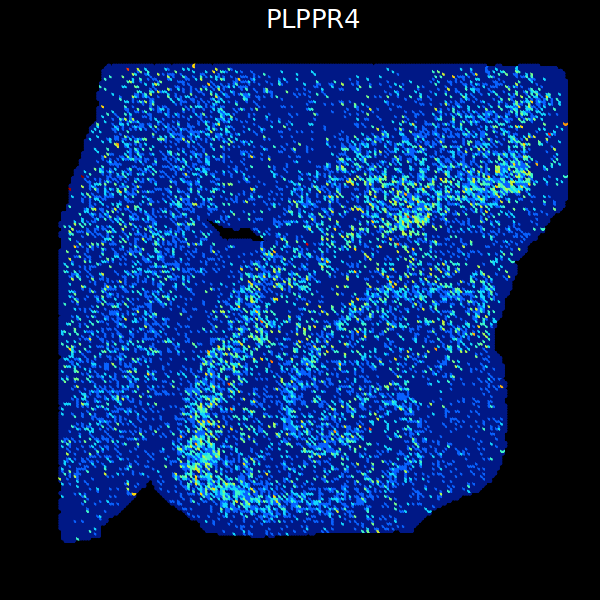

In [15]:
gene <- "PLPPR4"
df <- obj@meta.data
  df$expr <- obj@assays$SCT@data[gene,]
  options(repr.plot.width=5, repr.plot.height=5)
  ggplot(data = df, aes(x = coor_x, y = coor_y)) +
    geom_point_rast(aes(color = expr),
                    size = 0.5, 
                    alpha =1)+
    # geom_point_rast(data=line,aes(x=coor_x,y=coor_y),size=0.2,color='black',stroke = 0.0001,alpha=0.3) + #画线
    mytheme+
    theme_dr(xlength = 0.2,ylength = 0.2,
             arrow = grid::arrow(length = unit(0.1, "inches"), ends = 'last', type = "closed")) + 
    theme(panel.grid = element_blank())+
    scale_color_gradientn(colors = map) +
    labs(title = gene)+
    theme(plot.title = element_text(size=15,hjust = 0.5,face ="italic"))+
    theme(
    panel.background = element_rect(fill = "black"),  # 设置图形区域背景为黑色
    plot.background = element_rect(fill = "black"),   # 设置整个图形的背景为黑色
    plot.title = element_text(color = "white",face ="italic" ),
    legend.position = "none" 
  )

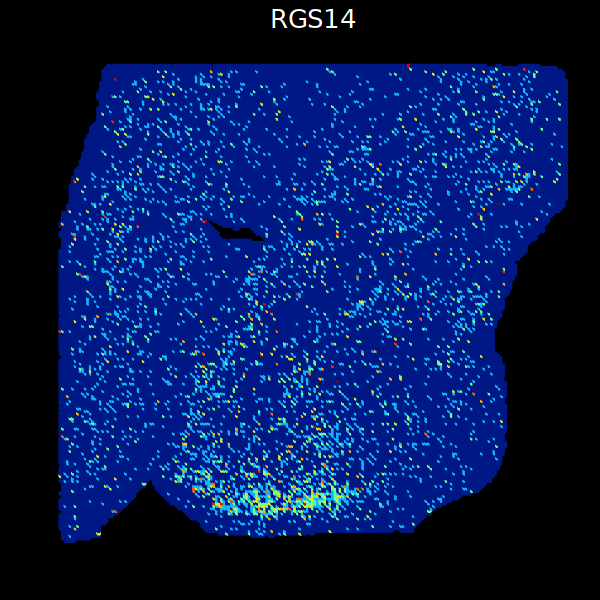

In [16]:
gene <- "RGS14"
df <- obj@meta.data
  df$expr <- obj@assays$SCT@data[gene,]
  options(repr.plot.width=5, repr.plot.height=5)
  ggplot(data = df, aes(x = coor_x, y = coor_y)) +
    geom_point_rast(aes(color = expr),
                    size = 0.5, 
                    alpha =1)+
    # geom_point_rast(data=line,aes(x=coor_x,y=coor_y),size=0.2,color='black',stroke = 0.0001,alpha=0.3) + #画线
    mytheme+
    theme_dr(xlength = 0.2,ylength = 0.2,
             arrow = grid::arrow(length = unit(0.1, "inches"), ends = 'last', type = "closed")) + 
    theme(panel.grid = element_blank())+
    scale_color_gradientn(colors = map) +
    labs(title = gene)+
    theme(plot.title = element_text(size=15,hjust = 0.5,face ="italic"))+
    theme(
    panel.background = element_rect(fill = "black"),  # 设置图形区域背景为黑色
    plot.background = element_rect(fill = "black"),   # 设置整个图形的背景为黑色
    plot.title = element_text(color = "white",face ="italic" ),
    legend.position = "none" 
  )

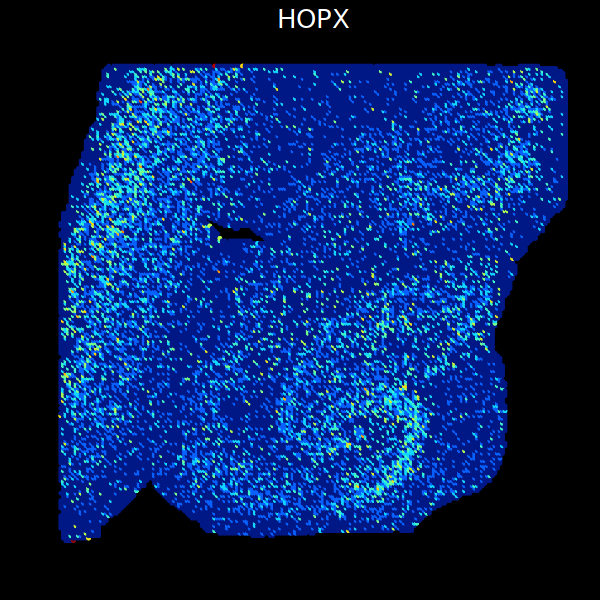

In [17]:
gene <- "HOPX"
df <- obj@meta.data
  df$expr <- obj@assays$SCT@data[gene,]
  options(repr.plot.width=5, repr.plot.height=5)
  ggplot(data = df, aes(x = coor_x, y = coor_y)) +
    geom_point_rast(aes(color = expr),
                    size = 0.5, 
                    alpha =1)+
    # geom_point_rast(data=line,aes(x=coor_x,y=coor_y),size=0.2,color='black',stroke = 0.0001,alpha=0.3) + #画线
    mytheme+
    theme_dr(xlength = 0.2,ylength = 0.2,
             arrow = grid::arrow(length = unit(0.1, "inches"), ends = 'last', type = "closed")) + 
    theme(panel.grid = element_blank())+
    scale_color_gradientn(colors = map) +
    labs(title = gene)+
    theme(plot.title = element_text(size=15,hjust = 0.5,face ="italic"))+
    theme(
    panel.background = element_rect(fill = "black"),  # 设置图形区域背景为黑色
    plot.background = element_rect(fill = "black"),   # 设置整个图形的背景为黑色
    plot.title = element_text(color = "white",face ="italic" ),
    legend.position = "none" 
  )

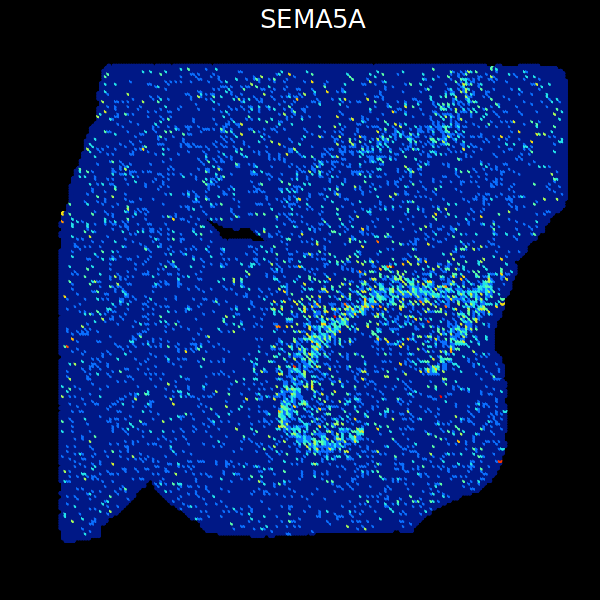

In [18]:
gene <- "SEMA5A"
df <- obj@meta.data
  df$expr <- obj@assays$SCT@data[gene,]
  options(repr.plot.width=5, repr.plot.height=5)
  ggplot(data = df, aes(x = coor_x, y = coor_y)) +
    geom_point_rast(aes(color = expr),
                    size = 0.5, 
                    alpha =1)+
    # geom_point_rast(data=line,aes(x=coor_x,y=coor_y),size=0.2,color='black',stroke = 0.0001,alpha=0.3) + #画线
    mytheme+
    theme_dr(xlength = 0.2,ylength = 0.2,
             arrow = grid::arrow(length = unit(0.1, "inches"), ends = 'last', type = "closed")) + 
    theme(panel.grid = element_blank())+
    scale_color_gradientn(colors = map) +
    labs(title = gene)+
    theme(plot.title = element_text(size=15,hjust = 0.5,face ="italic"))+
    theme(
    panel.background = element_rect(fill = "black"),  # 设置图形区域背景为黑色
    plot.background = element_rect(fill = "black"),   # 设置整个图形的背景为黑色
    plot.title = element_text(color = "white",face ="italic" ),
    legend.position = "none" 
  )

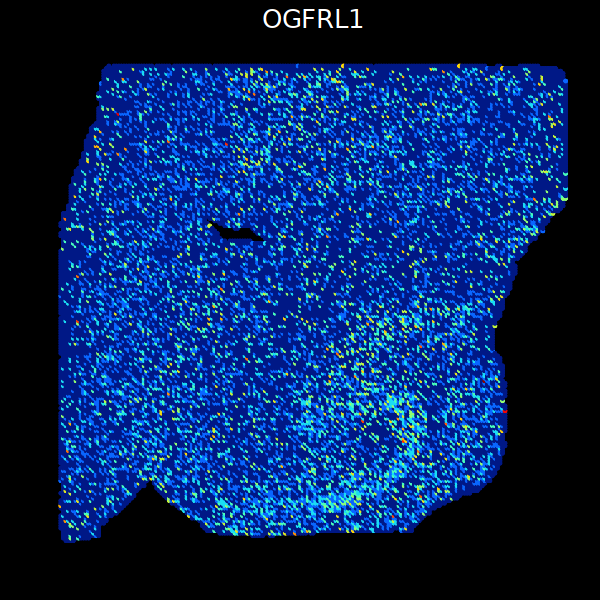

In [19]:
gene <- "OGFRL1"
df <- obj@meta.data
  df$expr <- obj@assays$SCT@data[gene,]
  options(repr.plot.width=5, repr.plot.height=5)
  ggplot(data = df, aes(x = coor_x, y = coor_y)) +
    geom_point_rast(aes(color = expr),
                    size = 0.5, 
                    alpha =1)+
    # geom_point_rast(data=line,aes(x=coor_x,y=coor_y),size=0.2,color='black',stroke = 0.0001,alpha=0.3) + #画线
    mytheme+
    theme_dr(xlength = 0.2,ylength = 0.2,
             arrow = grid::arrow(length = unit(0.1, "inches"), ends = 'last', type = "closed")) + 
    theme(panel.grid = element_blank())+
    scale_color_gradientn(colors = map) +
    labs(title = gene)+
    theme(plot.title = element_text(size=15,hjust = 0.5,face ="italic"))+
    theme(
    panel.background = element_rect(fill = "black"),  # 设置图形区域背景为黑色
    plot.background = element_rect(fill = "black"),   # 设置整个图形的背景为黑色
    plot.title = element_text(color = "white",face ="italic" ),
    legend.position = "none" 
  )

In [17]:
obj1 <- readRDS(paste0("/data/work/Tha/02.THA/01.lassodata/02.Thm.data/","T33", "_Bin100.Obj.thm.rds"))

In [19]:
str(obj1)

Formal class 'Seurat' [package "SeuratObject"] with 13 slots
  ..@ assays      :List of 1
  .. ..$ Spatial:Formal class 'Assay' [package "SeuratObject"] with 8 slots
  .. .. .. ..@ counts       :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:66032688] 0 8 19 20 21 29 32 47 58 60 ...
  .. .. .. .. .. ..@ p       : int [1:41397] 0 2364 4689 7174 8821 10675 12619 14655 16665 18955 ...
  .. .. .. .. .. ..@ Dim     : int [1:2] 16111 41396
  .. .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. .. ..$ : chr [1:16111] "NOC2L" "KLHL17" "PLEKHN1" "HES4" ...
  .. .. .. .. .. .. ..$ : chr [1:41396] "BIN100_9388" "BIN100_9390" "BIN100_9392" "BIN100_9393" ...
  .. .. .. .. .. ..@ x       : num [1:66032688] 1 2 1 1 3 4 1 1 1 5 ...
  .. .. .. .. .. ..@ factors : list()
  .. .. .. ..@ data         :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:66032688] 0 8 19 20 21 29 32 47 58 60 ...
  .. .. .. .. .. ..@

In [15]:
str(obj)

Formal class 'Seurat' [package "SeuratObject"] with 13 slots
  ..@ assays      :List of 2
  .. ..$ Spatial:Formal class 'Assay' [package "SeuratObject"] with 8 slots
  .. .. .. ..@ counts       :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:62093811] 370 3785 6270 6349 7028 7386 10319 11826 12112 13885 ...
  .. .. .. .. .. ..@ p       : int [1:29762] 0 13 142 225 361 654 1018 1210 1353 1599 ...
  .. .. .. .. .. ..@ Dim     : int [1:2] 30863 29761
  .. .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. .. ..$ : chr [1:30863] "TSPAN6" "TNMD" "DPM1" "SCYL3" ...
  .. .. .. .. .. .. ..$ : chr [1:29761] "429496736500" "429496736600" "429496736700" "429496736800" ...
  .. .. .. .. .. ..@ x       : num [1:62093811] 1 3 3 1 2 2 1 1 2 2 ...
  .. .. .. .. .. ..@ factors : list()
  .. .. .. ..@ data         :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:62093811] 370 3785 6270 6349 7028 7386 10319 11

In [14]:
SeuratObject::DefaultAssay(object) <- "Spatial"
main.layer = 'counts'
main.layer <- match.arg(main.layer, c("data", "counts", "scale.data"))
transfer.layers <- setdiff(transfer.layers, main.layer)
transfer.layers <- match.arg(transfer.layers, c("data", "counts", 
                                                "scale.data"))
# adata <- anndata::AnnData(X = Matrix::t(slot(object[[assay]], 
#                                              main.layer)))
# adata$obs_names <- colnames(object)
# adata$var_names <- rownames(object)
# if (!is.null(transfer.layers)) {
#   for (layer in transfer.layers) {
#     if (all(dim(slot(object[[assay]], layer)) == dim(slot(object[[assay]], 
#                                                           main.layer)))) 
#       adata$layers[[layer]] <- Matrix::t(SeuratObject::GetAssayData(object, 
#                                                                     assay = assay, slot = layer))
#   }
# }
# adata$obs <- slot(object, "meta.data")

ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'x' in selecting a method for function 'setdiff': object 'transfer.layers' not found


In [11]:
as.AnnDataR6.Seurat

function (object, assay = "RNA", is.spatial = FALSE, main.layer = "counts", 
    transfer.layers = NULL, outfile = NULL) 
{
    SeuratObject::DefaultAssay(object) <- assay
    main.layer <- match.arg(main.layer, c("data", "counts", "scale.data"))
    transfer.layers <- setdiff(transfer.layers, main.layer)
    transfer.layers <- match.arg(transfer.layers, c("data", "counts", 
        "scale.data"))
    adata <- anndata::AnnData(X = Matrix::t(slot(object[[assay]], 
        main.layer)))
    adata$obs_names <- colnames(object)
    adata$var_names <- rownames(object)
    if (!is.null(transfer.layers)) {
        for (layer in transfer.layers) {
            if (all(dim(slot(object[[assay]], layer)) == dim(slot(object[[assay]], 
                main.layer)))) 
                adata$layers[[layer]] <- Matrix::t(SeuratObject::GetAssayData(object, 
                  assay = assay, slot = layer))
        }
    }
    adata$obs <- slot(object, "meta.data")
    var <- slot(Seurat::GetAssay(object, assay = assay), "meta.features")
    if (ncol(var) > 0) {
        gene_count <- SeuratObject::GetAssayData(object, assay = assay, 
            slot = "counts")
        gene_count@x <- ifelse(gene_count@x > 0, 1, 0)
        var[["n_cells"]] <- rowSums(gene_count)
        rm(gene_count)
        gc()
        var[["feature_name"]] <- rownames(var)
        if (any(grepl("variable", colnames(var)))) {
            var[["highly_variable"]] <- var[[grep("variable", 
                colnames(var), value = TRUE)]]
        }
        if ("sct.gmean" %in% colnames(var)) {
            var[["means"]] <- var[["sct.gmean"]]
            var[["dispersions"]] <- ifelse("sct.variance" %in% 
                colnames(var), var[["sct.variance"]], 0)
            var[["residuals_dispersions"]] <- ifelse("sct.residual_variance" %in% 
                colnames(var), var[["sct.residual_variance"]], 
                0)
            var[["residual_mean"]] <- ifelse("sct.residual_mean" %in% 
                colnames(var), var[["sct.residual_mean"]], 0)
            var[["detection_rate"]] <- ifelse("detection_rate" %in% 
                colnames(var), var[["detection_rate"]], 0)
        }
        else if ("vst.mean" %in% colnames(var)) {
            var[["means"]] <- var[["vst.mean"]]
            var[["dispersion"]] <- ifelse("vst.variance" %in% 
                colnames(var), var[["vst.variance"]], 0)
            var[["dispersion_norm"]] <- ifelse("vst.variance.standardized" %in% 
                colnames(var), var[["vst.variance.standardized"]], 
                0)
        }
        else {
            var[["means"]] <- ifelse("mean" %in% colnames(var), 
                var[["mean"]], 0)
            var[["dispersion"]] <- ifelse("variance" %in% colnames(var), 
                var[["variance"]], 0)
            var[["variance.standardized"]] <- ifelse("variance.standardized" %in% 
                colnames(var), var[["variance.standardized"]], 
                0)
        }
        adata$var <- var
    }
    if (isTRUE(is.spatial) && grepl("spatial", assay, ignore.case = T)) {
        coord <- Reduce(rbind, lapply(SeuratObject::Images(object), 
            function(imgx) Seurat::GetTissueCoordinates(object[[imgx]])))
        colnames(coord) = c("spatial_2", "spatial_1")
        object[["spatial"]] <- SeuratObject::CreateDimReducObject(embeddings = as.matrix(coord), 
            key = "pyspatial_", assay = assay)
    }
    for (i in SeuratObject::Reductions(object)) {
        try({
            adata$obsm[[i]] <- SeuratObject::Embeddings(object, 
                reduction = i)
            reduction_sd <- SeuratObject::Stdev(object, reduction = i)
            if (!is.null(reduction_sd)) {
                reduc <- list()
                reduc[["variance"]] <- reduction_sd
                adata$uns[[i]] <- reduc
            }
        })
    }
    if (isTRUE(is.spatial)) {
        if (!is.null(SeuratObject::Images(object))) {
            for (imgx in SeuratObject::Images(object)) {
         

In [5]:
chipname = SN_list[i]

In [6]:
obj <- readRDS(paste0("/data/work/AD/bin/batch5/03.Raw.rds.data/",chipname,".bin100.raw.rds"))


In [7]:
obj <- NormalizeData(obj, normalization.method = "RC") 
obj <- SCTransform(obj, assay = "Spatial", verbose = FALSE) 
obj <- RunPCA(obj, assay = "SCT", verbose = FALSE) 
obj <- FindNeighbors(obj, reduction = "pca", dims = 1:40) 
obj <- FindClusters(obj, verbose = FALSE,resolution = c(0.5,0.8,1.2,1.5,2)) 
obj <- RunUMAP(obj, reduction = "pca", dims = 1:40) 

Computing nearest neighbor graph

Computing SNN

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
09:47:46 UMAP embedding parameters a = 0.9922 b = 1.112

09:47:46 Read 32982 rows and found 40 numeric columns

09:47:46 Using Annoy for neighbor search, n_neighbors = 30

09:47:46 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

09:47:49 Writing NN index file to temp file /tmp/RtmpKzoJiM/file29936da8d748

09:47:49 Searching Annoy index using 1 thread, search_k = 3000

09:48:00 Annoy recall = 100%

09:48:03 Commencing smooth kNN distance cal

In [30]:
coord <- data.frame(stereo_1 = obj$coor_x, stereo_2 = obj$coor_y)
obj[["stereo"]] <- SeuratObject::CreateDimReducObject(embeddings = as.matrix(coord), key = "stereo_", assay = "SCT")

In [ ]:
saveRDS(obj,file = paste0("/data/work/AD/bin/batch5/04.SCT&BayesSpace.data/",chipname,".bin100.SCT.rds"))

In [ ]:
as.AnnDataR6.Seurat(obj,is.spatial= T,assay = "Spatial",main.layer = 'counts',outfile=paste0(chipname,"_bin100.h5ad"))

In [31]:
# obj$row = obj$coor_y
# obj$col = obj$coor_x

In [5]:
# obj1 <- readRDS(paste0("/data/work/Tha/02.THA/01.lassodata/04.SCT.data/","T33", "_Bin100.Obj.thm.SCT.rds"))

In [6]:
# obj1$row = obj1$coor_y
# obj1$col = obj1$coor_x

In [7]:
# sce <- as.SingleCellExperiment(obj1,assay='SCT')
# set.seed(1234)
# sce <- spatialPreprocess(sce, platform="ST", 
#                          n.PCs=50, n.HVGs=3000, log.normalize=F)



In [3]:
# n_clu=50 
# sce <- spatialCluster(sce, q=n_clu,
#                       platform="ST", 
#                       d=30,
#                       init.method="mclust",
#                       model="t",
#                       gamma=2,
#                       nrep=10000, 
#                       burn.in=100, 
#                       save.chain=TRUE)



In [ ]:
# fname3=paste0(chipname,".clusterPlot",n_clu,".pdf")
# pdf(fname3)
# p = clusterPlot(sce,label = "spatial.cluster",color=NA,palette=colsblack[1:n_clu])
# print(p)
# dev.off()
# meta = colData(sce)
# fname6<-paste0(chipname,'.BayesSpace.clustering',n_clu,'.rds')
# meta = meta[as.matrix(rownames(obj@meta.data)),]
# saveRDS(meta,fname6)